# CREDIT CARD FRAUD DETECTION
## USING LOGISTIC REGRESSION

## Steps to follow

1) Preparing the Data

2) Data Analysis


3) Training the model

4) Evaluating the model

In [1]:
# Importing the required modules

import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns


In [2]:
# Importing the Dataset

data = pd.read_csv("creditcard1.csv")
data.head()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Getting some information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Summary Statistics on the relevant variables

desc = data.describe()
desc[["time","amount","class"]]

,time,amount,class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [13]:
data.describe()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Checking for missing values

data.isnull().sum()

time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
amount    0
class     0
dtype: int64

NOTE : In the class column, legti transactions are represented by the value 0 and fraudulent transactions are represented by the value 1

In [65]:
# Distribution of legit transcaction and fraudulent transaction

legit_transactions = data[data['class'] == 0]['class'].count()
print("The number of Legit Transactions in the Dataset are {}".format(legit_transactions))

fraud_transactions = data[data['class'] == 1]['class'].count()
print("The number of Fraud Transactions in the Dataset are {}".format(fraud_transactions))


The number of Legit Transactions in the Dataset are 284315
The number of Fraud Transactions in the Dataset are 492


<AxesSubplot:>

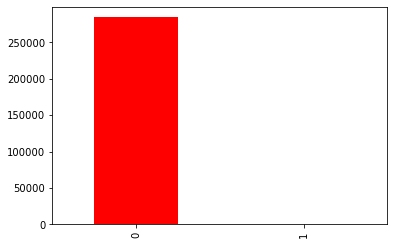

In [47]:
data['class'].value_counts().plot(kind = 'bar', color = 'red')

In [ ]:
# Separating the dataset on the basis of class for analysis

legit = data[data['class'] == 0]
fraud = data[data['class'] == 1]

In [14]:
# Summary statistics

legit['amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: amount, dtype: float64

C:\Users\Siddharth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Legti transactions Amount Boxplot')

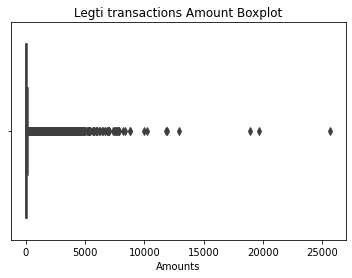

In [40]:
sns.boxplot(legit['amount'])
plt.xlabel("Amounts")
plt.title("Legti transactions Amount Boxplot")

In [15]:
fraud['amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: amount, dtype: float64

The mean amount is higher in the case of fraudulent transactions

C:\Users\Siddharth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Fraud transactions amounts boxplot')

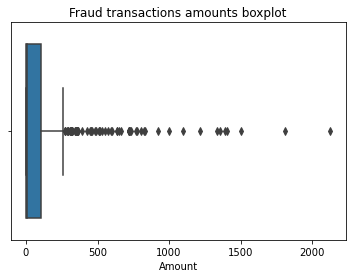

In [39]:
sns.boxplot(fraud['amount'])
plt.xlabel("Amount")
plt.title("Fraud transactions amounts boxplot")

In [16]:
data.groupby('class').mean()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount
class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [33]:
means = data.groupby('class').mean()['amount']
means

class
0     88.291022
1    122.211321
Name: amount, dtype: float64

NOTE : Since majority of the data relates to class value 0 i.e. legit transaction, the dataset is henced unbalanced

Text(0.5, 1.0, 'Amount means grouped by Class')

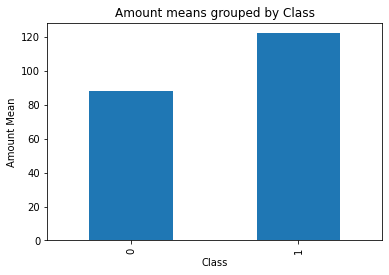

In [54]:
means.plot(kind = 'bar')
plt.ylabel('Amount Mean')
plt.xlabel('Class')
plt.title("Amount means grouped by Class")

Evidently, the mean of the amounts of fraud transactions is higher than the mean amount of the legit transactions.

In [56]:
# For Balancing the Dataset

sample_size = fraud['class'].count()

legit_sample = legit.sample(n = sample_size )



In [57]:
# Concatenateing the fraudulent dataset and the sample of legit dataset

data1 = pd.concat([legit_sample, fraud], axis = 0)
data1.head()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,amount,class
60924,49566.0,-3.691904,-0.818414,-0.248760,-1.681348,-1.407207,0.130421,-0.539735,1.142850,-0.979153,...,0.214162,0.368119,-1.203180,-0.873302,0.593417,-0.162695,0.088171,-0.586114,182.00,0
53316,45918.0,-0.998757,0.629252,1.045678,-3.540411,-0.396660,-1.563108,0.619038,0.236641,1.177200,...,0.030634,0.187277,-0.095316,0.627789,0.164768,-1.250533,0.031090,0.060278,4.71,0
217841,141064.0,-1.520671,-0.866538,-1.034818,-1.157077,0.529674,1.549244,0.221089,0.756722,-1.270904,...,0.200823,1.062323,-0.099676,-0.786453,-0.595779,0.008781,0.411195,0.028983,223.72,0
263682,161067.0,-0.793535,1.062776,-1.046351,0.654689,1.125950,-0.212859,0.937929,0.326916,-1.051740,...,0.196226,0.415783,-0.086608,0.163949,-0.286585,-0.551745,0.201860,0.184387,60.00,0
51446,44948.0,-1.099613,-0.175861,1.545668,-0.311178,1.607608,-0.735936,1.255935,-1.437645,1.093125,...,-0.388385,0.342232,-0.641310,0.116119,-0.521944,0.899260,-1.065367,-0.863437,2.00,0


In [58]:
data1['class'].value_counts()

0    492
1    492
Name: class, dtype: int64

In [59]:
data1.groupby('class').mean()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount
class,,,,,,,,,,,,,,,,,,,,,
0,94600.971545,0.056116,-0.039234,0.127041,-0.009298,-0.080540,0.048455,0.020642,-0.007716,0.102943,...,0.058738,0.031902,0.022828,-0.015376,-0.027089,0.026126,0.037556,-0.010003,0.001572,102.849817
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Text(0.5, 1.0, 'Balanced Data')

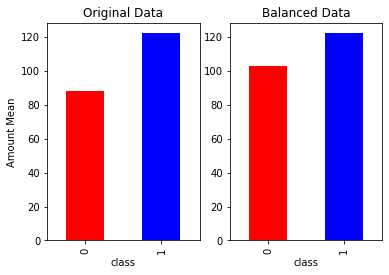

In [61]:
plt.subplot(1,2,1)
plt.title("Original Data")
plt.ylabel("Amount Mean")
data.groupby('class').mean()['amount'].plot(kind = 'bar', color = ('red','blue'))

plt.subplot(1,2,2)
data1.groupby('class').mean()['amount'].plot(kind = 'bar', color = ('red','blue'))
plt.title("Balanced Data")

The difference in the amount means of fraud and legit transactions is found to be decreased after balancing the data set. Still the mean amount of fraud transactions remain higher.

In [27]:
# Splitting the data into target and explainatory variables

X = data1.drop(columns= 'class', axis = 1)
Y = data1['class']

In [28]:
# Splittig the data into testing and training test

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, stratify = Y , random_state = 2) 


In [29]:
# Training the Model

model = LogisticRegression()

model.fit(X_train, Y_train)

LogisticRegression()

In [31]:
# Checking the accuracy on the training dataset

X_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(X_train_pred, Y_train)

In [32]:
print(train_accuracy)

0.9275730622617535


In [33]:
# Checking the accuracy on the test dataset

X_test_predict = model.predict(X_test)
test_accuracy = accuracy_score(X_test_predict, Y_test)
print(test_accuracy)

0.9137055837563451


This concludes that the model correctly predicts the outcome i.e. Legit or Fraud transaction, approx 91.37% of the time.